<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-February/blob/main/All%20Assignments%20%2B%20Solutions/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt

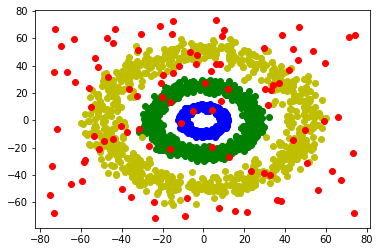

In [16]:
def circle():
    X, y = make_circles(noise = 0.1, factor = 0.3, n_samples = 1500)
    X = X[ y==0]
    y = y[y==0]
    return X, y

X1, y1 = circle()
X2, y2 = circle()
X3, y3 = circle()
n1 = np.random.rand(100, 2)*150 - 75
# n2 = np.random.rand(100)*150 - 75

X1 *= 10
X2 *= 25
X3 *= 50

plt.scatter(X1[:, 0], X1[:, 1], color = 'b')
plt.scatter(X2[:, 0], X2[:, 1], color = 'g')
plt.scatter(X3[:, 0], X3[:, 1], color = 'y')
plt.scatter(n1[:, 0], n1[:, 1], color = 'r')

In [17]:
X = np.vstack([X1, X2, X3, n1])

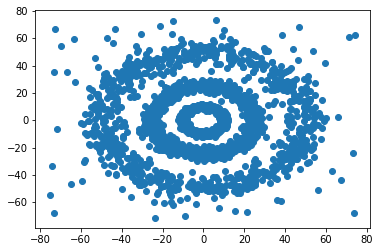

In [18]:
plt.scatter(X[:, 0], X[:, 1])

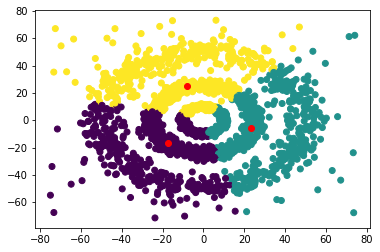

In [19]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)
km.fit(X)
plt.scatter(X[:, 0], X[:, 1], c = km.predict(X))
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], color = 'red')

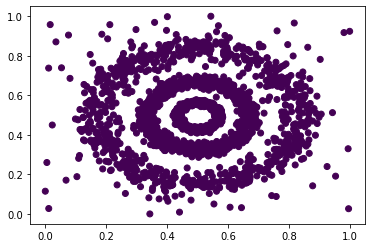

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler().fit_transform(X)

db = DBSCAN(eps=0.5, min_samples=5)
y_pred = db.fit_predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c = y_pred)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
np.unique(y_pred)

array([0])

In [23]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5)
nn.fit(scaled)

NearestNeighbors()

In [24]:
distance, index =  nn.kneighbors(scaled)
distance

array([[0.        , 0.00286955, 0.00292956, 0.00294709, 0.00376115],
       [0.        , 0.00360441, 0.00415878, 0.00436242, 0.00514483],
       [0.        , 0.00153366, 0.00164643, 0.00402099, 0.00550261],
       ...,
       [0.        , 0.03010626, 0.07210127, 0.07761914, 0.089664  ],
       [0.        , 0.03758028, 0.09234579, 0.09522412, 0.09997863],
       [0.        , 0.03109403, 0.03340343, 0.03458003, 0.04068186]])

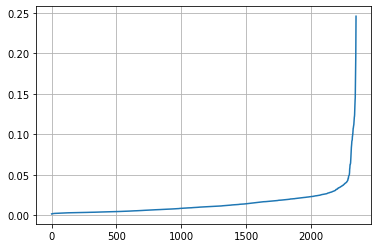

In [25]:
dis = distance[:, 4]
dis.sort()
plt.grid()
plt.plot(dis)

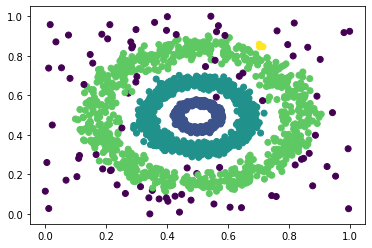

In [26]:
db = DBSCAN(eps=0.03, min_samples=5)
y_pred = db.fit_predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c = y_pred)


In [27]:
y_pred

array([ 0,  0,  0, ..., -1, -1, -1])

In [28]:
np.unique(y_pred)

array([-1,  0,  1,  2,  3])

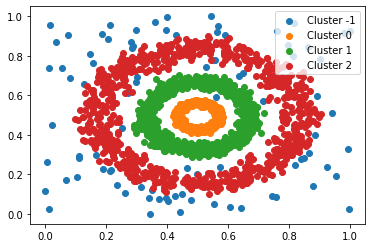

In [29]:
for i in [-1, 0, 1, 2]:
    plt.scatter(scaled[ y_pred==i, 0], scaled[y_pred==i, 1], label = 'Cluster {}'.format(i))

plt.legend()

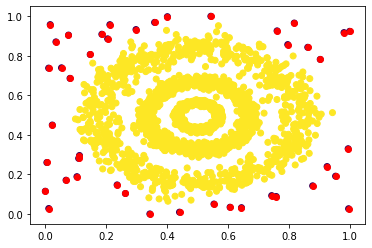

In [30]:
db = DBSCAN(eps=0.05, min_samples=5)
y_pred = db.fit_predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c = y_pred)

plt.scatter(scaled[ y_pred==-1, 0], scaled[y_pred==-1, 1], color = 'r')

In [31]:
y_pred

array([ 0,  0,  0, ..., -1, -1,  0])

In [32]:
np.unique(y_pred)

array([-1,  0])

**https://raw.githubusercontent.com/Pepcoders/Pepcoding-Data-Science/main/dataset/CC%20GENERAL.csv**